## Diabetic Retinopathy

In this kernel we wil use Convolutional Neural Networks to predict the probability that wether a person is suffering from DIabteic Retinopathy or not using the sample images provided to us in the dataset.

**Diabetic retinopathy** is a diabetes complication that affects eyes. It's caused by damage to the blood vessels of the light-sensitive tissue at the back of the eye (retina). At first, diabetic retinopathy may cause no symptoms or only mild vision problems.

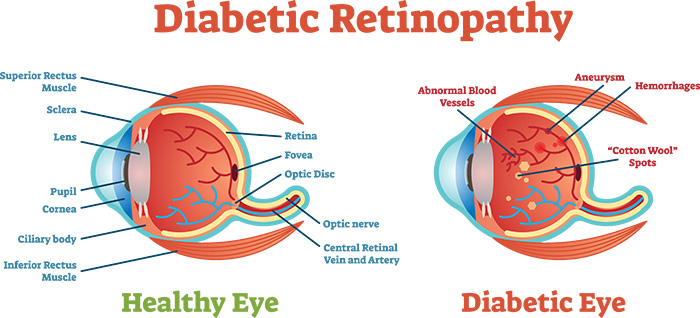

You might not have symptoms in the early stages of diabetic retinopathy. As the condition progresses, diabetic retinopathy symptoms may include:

* Spots or dark strings floating in your vision (floaters)
* Blurred vision
* Fluctuating vision
* Impaired color vision
* Dark or empty areas in your vision
* Vision loss
* Diabetic retinopathy usually affects both eyes.

**Diabetic retinopathy can lead to other serious eye conditions:** 

1. Diabetic macular edema (DME). Over time, about half of people with diabetic retinopathy will develop DME. DME happens when blood vessels in the retina leak fluid, causing swelling in the macula (a part of the retina). If you have DME, your vision will become blurry because of the extra fluid in your macula.  

2. Neovascular glaucoma. Diabetic retinopathy can cause abnormal blood vessels to grow out of the retina and block fluid from draining out of the eye. This causes a type of glaucoma.

Diabetic retinopathy is caused by high blood sugar due to diabetes. Over time, having too much sugar in your blood can damage your retina — the part of your eye that detects light and sends signals to your brain through a nerve in the back of your eye (optic nerve).  



Diabetes damages blood vessels all over the body. The damage to your eyes starts when sugar blocks the tiny blood vessels that go to your retina, causing them to leak fluid or bleed. To make up for these blocked blood vessels, your eyes then grow new blood vessels that don’t work well. These new blood vessels can leak or bleed easily. 

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Using the Image Data Generator 

In [3]:
datagen = ImageDataGenerator(rescale=1./255,
                                      zoom_range=0.2,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      validation_split=0.2
                                      )
train_data = datagen.flow_from_directory('C:\Diabetic Retinopathy Using Quantum Computing\Diabetic-Retinopathy-using-Quantum-Computing\Diabetic Retinopathy Dataset',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'training')

valid_data = datagen.flow_from_directory('C:\Diabetic Retinopathy Using Quantum Computing\Diabetic-Retinopathy-using-Quantum-Computing\Diabetic Retinopathy Dataset',
                                                     target_size=(224,224),
                                                     batch_size=32,
                                                     class_mode = 'categorical',
                                                     subset = 'validation')

Found 2200 images belonging to 5 classes.
Found 550 images belonging to 5 classes.


In [8]:
y_train = train_data.labels
# print(y_train)
y_train

array([0, 0, 0, ..., 4, 4, 4])

## Now, let us try Efficient Net

Google recently published both a very exciting paper and source code for a newly designed CNN (convolutional neural network) called EfficientNet, that set new records for both accuracy and computational efficiency.
This was not a minor improvement but rather an accuracy improvement of up to 6% while on the order of 5–10x more efficient than most current CNN’s. 

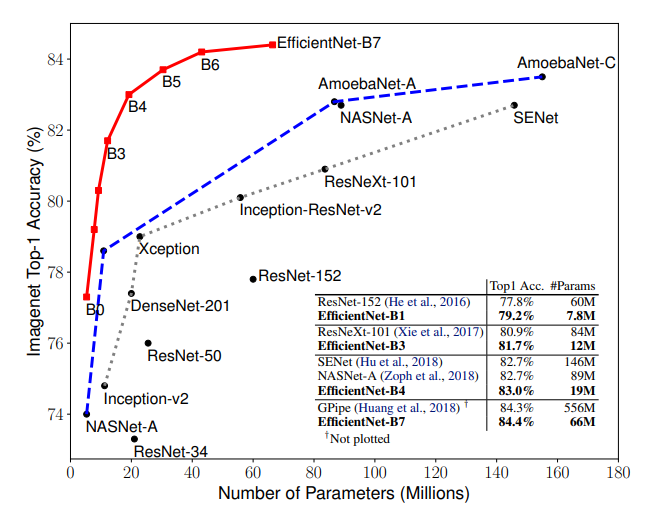

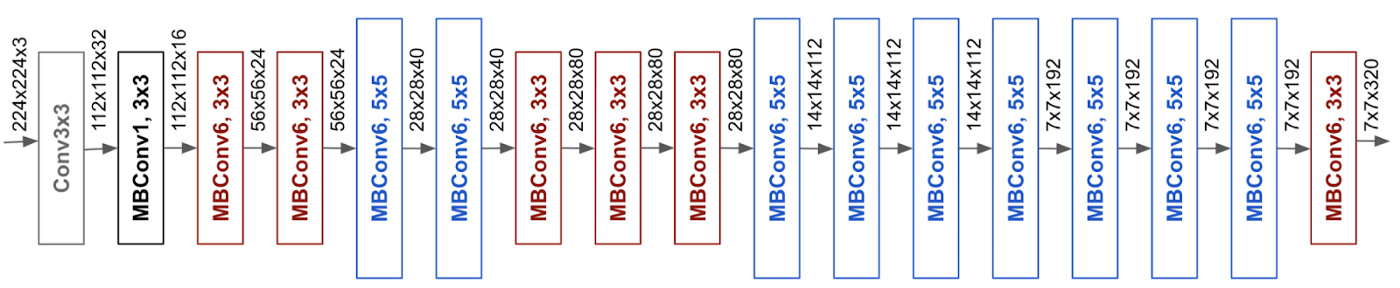

## Using EfficientNet for Transfer Learning

In [ ]:
# pip install -q efficientnet

In [4]:
# import efficientnet.tfkeras as efn

## Defining the learning rate scheduler

In [3]:
def lr_rate(epoch,lr):
    if epoch<10:
        lr=0.0001
        return lr
    elif epoch<=15:
        lr=0.0001
        return lr
    elif epoch<=30:
        lr=0.0001
        return lr
    else:
        lr=lr*(epoch/(1+epoch))
        return lr
lr_callback=tf.keras.callbacks.LearningRateScheduler(lr_rate)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(train_data,y_train)


In [19]:
# from keras import metrics
# from tensorflow import keras
# def MyModel(num_classes):
#     model = keras.Sequential([
#         keras.layers.Input(shape=(224, 224, 3)),
#         keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same"),
#         keras.layers.MaxPooling2D((2, 2)),
#         keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same"),
#         keras.layers.MaxPooling2D((2, 2)),
#         keras.layers.Flatten(),
#         keras.layers.Dense(128, activation="relu"),
#         keras.layers.Dropout(0.5),
#         keras.layers.Dense(64, activation="relu"),
#         keras.layers.Dropout(0.5),
#         keras.layers.Dense(num_classes, activation="softmax")
#     ])
#     model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
#     return model

In [8]:
# model = tf.keras.Sequential([
#         efn.EfficientNetB5(
#             input_shape=(224,224, 3),
#             weights='imagenet',
#             include_top=False
#         ),tf.keras.layers.Flatten(),tf.keras.layers.Dense(5, activation='softmax')
#     ])
    
# model.compile(optimizer="Adam",loss='categorical_crossentropy',metrics=['acc'])


In [21]:

model = MyModel(5)
history=model.fit_generator(train_data,validation_data = valid_data,callbacks=[lr_callback],epochs=5,verbose=2)


C:\Users\manya\AppData\Local\Temp\ipykernel_5116\1790181135.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_data,validation_data = valid_data,callbacks=[lr_callback],epochs=5,verbose=2)


Epoch 1/5
69/69 - 255s - loss: 1.6244 - accuracy: 0.3264 - val_loss: 1.4139 - val_accuracy: 0.3636 - lr: 1.0000e-04 - 255s/epoch - 4s/step
Epoch 2/5
69/69 - 254s - loss: 1.3960 - accuracy: 0.3909 - val_loss: 1.2699 - val_accuracy: 0.3691 - lr: 1.0000e-04 - 254s/epoch - 4s/step
Epoch 3/5
69/69 - 256s - loss: 1.3158 - accuracy: 0.4559 - val_loss: 1.2342 - val_accuracy: 0.5818 - lr: 1.0000e-04 - 256s/epoch - 4s/step
Epoch 4/5
69/69 - 260s - loss: 1.3186 - accuracy: 0.4955 - val_loss: 1.2339 - val_accuracy: 0.5909 - lr: 1.0000e-04 - 260s/epoch - 4s/step
Epoch 5/5
69/69 - 255s - loss: 1.2857 - accuracy: 0.5041 - val_loss: 1.1883 - val_accuracy: 0.6018 - lr: 1.0000e-04 - 255s/epoch - 4s/step


## We got smoother validation and training curves.

In [22]:
import matplotlib.pyplot as plt

In [23]:
def display_training_curves(training, validation, title, subplot):
    
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

C:\Users\manya\AppData\Local\Temp\ipykernel_5116\3572304003.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


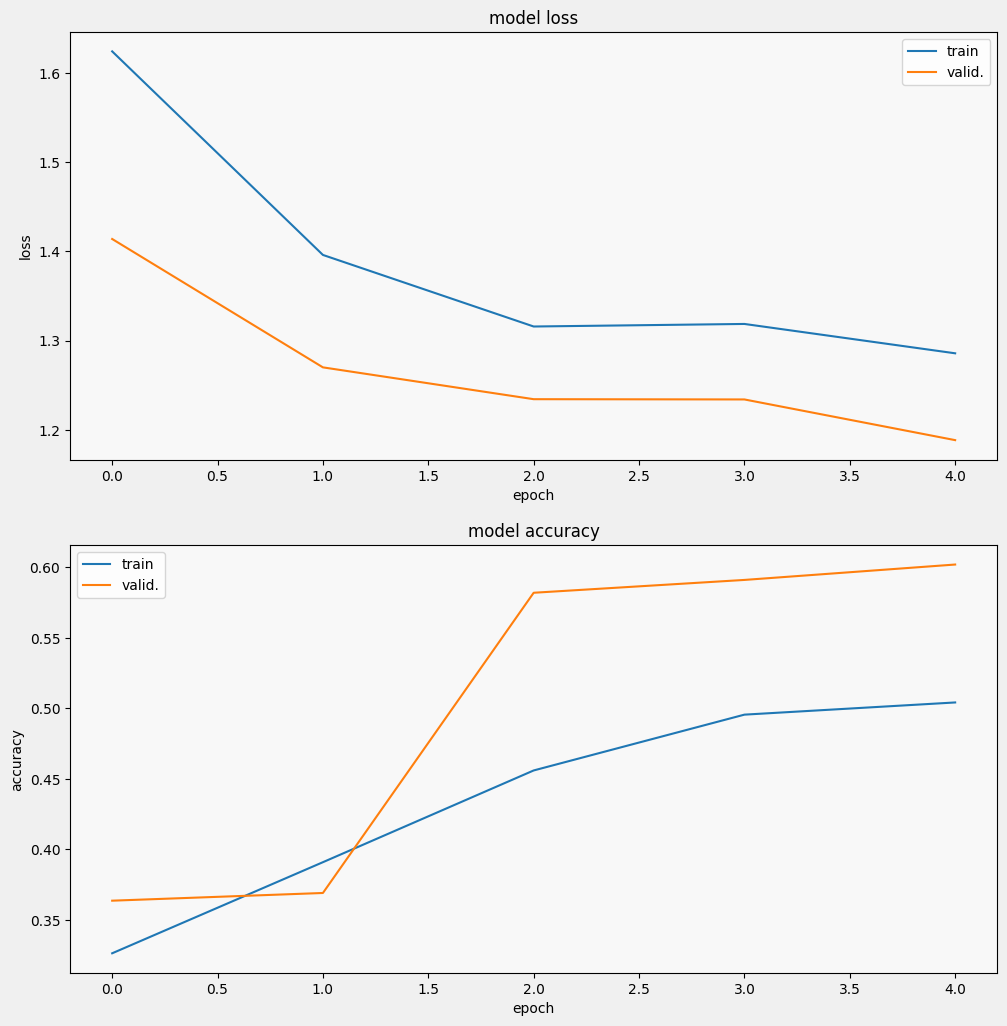

In [26]:
display_training_curves(
    history.history['loss'], 
    history.history['val_loss'], 
    'loss', 211)
display_training_curves(
    history.history['accuracy'], 
    history.history['val_accuracy'], 
    'accuracy', 212)

In [30]:
# save the trained model to use
model.save('classical_model.h5')

In [33]:
# get class names associated with dataset images
categories = ['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']
print(categories)

['Mild', 'Moderate', 'No_DR', 'Proliferate_DR', 'Severe']


In [31]:
import numpy as np

1/1 [==============================] - 0s 83ms/step


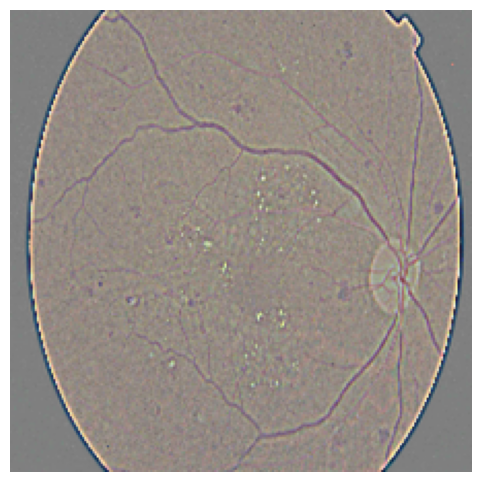

Predicted case -> No_DR


In [39]:
# Testing the model using sample image
image_path = "C:\Diabetic Retinopathy Using Quantum Computing\Diabetic-Retinopathy-using-Quantum-Computing\Diabetic Retinopathy Dataset\Severe DR\Severe DR_10.png"
image = tf.keras.preprocessing.image.load_img(image_path)
image = image.resize((224,224))
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = image_array / 255.0
scaled_img = np.expand_dims(image_array, axis=0)
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.axis("off")

# Use model to predict the sample image
pred = model.predict(scaled_img)

# show the output of predicted image
output = categories[np.argmax(pred)]
plt.show()
print("Predicted case ->", output)